In this course, we learnt what's the search problem and what's the machine leanring. In this assignment, we need you do some more practice.

# 北京地铁换乘

参考：
https://github.com/wanglixcg/li/blob/master/nlp-02-%E4%BD%9C%E4%B8%9A.py%20(1).ipynb

Done！本.ipynb文件已经成功实现北京地铁换乘

In [124]:
import requests
import re

In [125]:
url = 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485'

In [126]:
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/73.0.3683.75 Safari/537.36'
}

In [127]:
response = requests.get(url,headers=headers)

In [128]:
response

<Response [200]>

In [129]:
response.encoding = 'utf-8'

In [130]:
pattern = re.compile(r'<a target=_blank href="(/item/[0-9a-zA-Z\%]+)">(北京地铁.+?线)</a>')

In [131]:
pattern

re.compile(r'<a target=_blank href="(/item/[0-9a-zA-Z\%]+)">(北京地铁.+?线)</a>',
re.UNICODE)

In [132]:
results = re.findall(pattern,response.text)

In [133]:
results

[('/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%811%E5%8F%B7%E7%BA%BF', '北京地铁1号线'),
 ('/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%811%E5%8F%B7%E7%BA%BF', '北京地铁1号线'),
 ('/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8113%E5%8F%B7%E7%BA%BF',
  '北京地铁13号线'),
 ('/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8113%E5%8F%B7%E7%BA%BF',
  '北京地铁13号线'),
 ('/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81%E5%85%AB%E9%80%9A%E7%BA%BF',
  '北京地铁八通线'),
 ('/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%815%E5%8F%B7%E7%BA%BF', '北京地铁5号线'),
 ('/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%818%E5%8F%B7%E7%BA%BF', '北京地铁8号线'),
 ('/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8110%E5%8F%B7%E7%BA%BF',
  '北京地铁10号线'),
 ('/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81%E6%9C%BA%E5%9C%BA%E7%BA%BF',
  '北京地铁机场线'),
 ('/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%814%E5%8F%B7%E7%BA%BF', '北京地铁4号线'),
 ('/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8115%E5%8F%B7%E7%BA%BF',
  '北京地铁15号线'),
 ('/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81%E6%98%8C%E5%B9%B3%E7%BA%BF',
  '北京地铁昌平线'),
 ('/it

In [134]:
from collections import defaultdict
links_dict = defaultdict(None)

In [135]:
url_front = 'https://baike.baidu.com'
for herf, name in results:
    links_dict[name] = url_front+herf

In [136]:
links_dict

defaultdict(None,
            {'北京地铁10号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8110%E5%8F%B7%E7%BA%BF',
             '北京地铁13号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8113%E5%8F%B7%E7%BA%BF',
             '北京地铁14号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8114%E5%8F%B7%E7%BA%BF',
             '北京地铁15号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8115%E5%8F%B7%E7%BA%BF',
             '北京地铁16号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8116%E5%8F%B7%E7%BA%BF',
             '北京地铁1号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%811%E5%8F%B7%E7%BA%BF',
             '北京地铁2号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%812%E5%8F%B7%E7%BA%BF',
             '北京地铁4号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%814%E5%8F%B7%E7%BA%BF',
             '北京地铁5号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%

用函数表示上述爬虫，如下：

In [217]:
def get_url(url,pattern):
    requests.packages.urllib3.disable_warnings() ## 屏蔽warning信息
    response = requests.get(url,headers='',verify = False)
    response.encoding='utf-8'
    pattern_s = re.compile(pattern)
    result = re.findall(pattern_s, response.text)
    return result

In [230]:
from collections import defaultdict
def get_initial_links(initial_link,initial_pattern):
    response = get_url(initial_link,initial_pattern)
    links_dict = defaultdict(None)
    url_front = 'https://baike.baidu.com'
    for herf1, name in response:
        links_dict[name] = url_front + herf1
    return links_dict
    
   

In [231]:
initial_link = 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485'
initial_pattern = r'<a target=_blank href="(/item/[0-9a-zA-Z\%]+)">(北京地铁.+?线)</a>'
subway_line = get_initial_links(initial_link,initial_pattern)
subway_line

defaultdict(None,
            {'北京地铁10号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8110%E5%8F%B7%E7%BA%BF',
             '北京地铁13号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8113%E5%8F%B7%E7%BA%BF',
             '北京地铁14号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8114%E5%8F%B7%E7%BA%BF',
             '北京地铁15号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8115%E5%8F%B7%E7%BA%BF',
             '北京地铁16号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8116%E5%8F%B7%E7%BA%BF',
             '北京地铁1号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%811%E5%8F%B7%E7%BA%BF',
             '北京地铁2号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%812%E5%8F%B7%E7%BA%BF',
             '北京地铁4号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%814%E5%8F%B7%E7%BA%BF',
             '北京地铁5号线': 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%

In [234]:
from collections import defaultdict
import re
def get_station():
    initial_link = 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485'
    initial_pattern = r'<a target=_blank href="(/item/[0-9a-zA-Z\%]+)">(北京地铁.+?线)</a>'
    links = get_initial_links(initial_link,initial_pattern)
    links_station=defaultdict(None)
    
    links_station['1号线']=get_url(links['北京地铁1号线'],r'<tr><td align="center" valign="middle" colspan="1" rowspan="1">(\w+?)</td>')
    links_station['13号线']=get_url(links['北京地铁13号线'],r'<th align="center" valign="middle">(\w+?)</th>')[1:]
    links_station['八通线']=get_url(links['北京地铁八通线'],r'<th align="center" valign="middle">(\w+?)</th>')[4:]
    links_station['5号线']=get_url(links['北京地铁5号线'],r'<th width="88" align="center" valign="middle">(\w+?)</th>')
    links_station['8号线']=get_url(links['北京地铁8号线'],r'<th width="[0-9]+">(\w+?)</th>')[5:]
    links_station['10号线']=get_url(links['北京地铁10号线'],r'<td width="114" align="middle" valign="center">(\w+?)</td>')
    links_station['机场线']=get_url(links['北京地铁机场线'],r'<th align="center" valign="middle">(\w+?)</th>')[2:]
    links_station['4号线']=get_url(links['北京地铁4号线'],r'<td align="center" valign="middle" colspan="1" rowspan="1">(\w+)</td>')[25:]
    links_station['15号线']=get_url(links['北京地铁15号线'],r'<th align="center" valign="middle">(\w+?)</th>')
    links_station['昌平线']=get_url(links['北京地铁昌平线'],r'<th width="98">(\w+?)</th>')[1:]
    links_station['大兴线']=get_url(links['北京地铁大兴线'],r'<td width="88" align="center" valign="middle">(\w+?)</td>')
    links_station['房山线']=get_url(links['北京地铁房山线'],r'<th align="center" valign="middle">(\w+?)</th>')[3:]
    links_station['亦庄线']=get_url(links['北京地铁亦庄线'],r'<div class="para" label-module="para"><a target=_blank href="/item/.+?" data-lemmaid=".+?">(\w+?)</a></div>')
    links_station['9号线']=get_url(links['北京地铁9号线'],r'<th>(\w+?)</th>')
    links_station['6号线']=get_url(links['北京地铁6号线'],r'<th>(\w+?)</th>')[3:]
    links_station['14号线']=get_url(links['北京地铁14号线'],r'<td width="101" align="center" valign="middle">(\w+?)</td>')
    links_station['7号线']=get_url(links['北京地铁7号线'],r'<th>(\w+?)</th>')[2:]
    links_station['16号线']=get_url(links['北京地铁16号线'],r'<th>(\w+?)</th>')[5:]
    links_station['西郊线']=get_url(links['北京地铁西郊线'],r'<div class="para" label-module="para"><a target=_blank href="/item/.+?">(\w+?)</a></div>')+['万安站']
    links_station['西郊线'].pop(-2)
    links_station['S1线']=get_url(links['北京地铁S1线'],r'<td width="130" align="center" valign="top">(\w+?)</td>')+['苹果园站']
    links_station['燕房线']=get_url(links['北京地铁燕房线'],r'<th width="184">(\w+?)</th>')[1:]
    links_station['2号线']=get_url(links['北京地铁2号线'],r'<th>(\w+?)</th>')[6:]
  
    
    return links_station    

In [235]:
station_list = get_station()
station_list

defaultdict(None,
            {'10号线': ['巴沟',
              '火器营',
              '长春桥',
              '车道沟',
              '慈寿寺',
              '西钓鱼台',
              '公主坟',
              '莲花桥',
              '六里桥',
              '西局',
              '泥洼',
              '丰台站',
              '首经贸',
              '纪家庙',
              '草桥',
              '角门西',
              '角门东',
              '大红门',
              '石榴庄',
              '宋家庄',
              '成寿寺',
              '分钟寺',
              '十里河',
              '潘家园',
              '劲松',
              '双井',
              '国贸',
              '金台夕照',
              '呼家楼',
              '团结湖',
              '农业展览馆',
              '亮马桥',
              '三元桥',
              '太阳宫',
              '芍药居',
              '惠新西街南口',
              '安贞门',
              '北土城',
              '健德门',
              '牡丹园',
              '西土城',
              '知春路',
              '知春里',
              '海淀黄庄',
              '苏州街'],
             '13号线': ['西直门'

## 站与站之间联系

思路：对于每条地铁线遍历每个站，把车站的前后站添加到该站为名的集合中。

In [252]:
from collections import defaultdict
def relate():
    station_start = list()
    for stations in station_list.values():
        for station in stations:
            if station in station_start:continue
            station_start.append(station)
    
    station_connect = defaultdict(None)
    for station in station_start:
        station_connect[station]=set()
    
    for stations in station_list.values():
        for index,station in enumerate(stations):
            if index == 0 and stations:
                station_connect[station].add(stations[index+1])
            elif index == len(stations)-1:
                station_connect[station].add(stations[index-1])
            else:
                station_connect[station].add(stations[index+1])
                station_connect[station].add(stations[index-1])
    
    return station_connect
            

In [253]:
a=[1]
not a

False

In [254]:
station_connection = relate()
station_connection  

defaultdict(None,
            {'2号航站楼': {'3号航站楼'},
             '3号航站楼': {'2号航站楼', '三元桥'},
             '七里庄': {'丰台东大街', '六里桥', '大井', '西局'},
             '万安站': {'植物园站'},
             '万寿路': {'五棵松', '公主坟'},
             '三元桥': {'3号航站楼', '东直门站', '亮马桥', '太阳宫'},
             '上地': {'五道口', '西二旗'},
             '上岸站': {'栗园庄站', '桥户营站'},
             '东单': {'建国门', '王府井'},
             '东四': {'南锣鼓巷', '朝阳门'},
             '东四十条': {'东直门', '朝阳门'},
             '东夏园': {'潞城', '郝家府'},
             '东大桥': {'呼家楼', '朝阳门'},
             '东直门': {'东四十条', '柳芳', '雍和宫'},
             '东直门站': {'三元桥'},
             '东高地': {'和义', '火箭万源'},
             '中关村': {'北京大学东门', '海淀黄庄'},
             '中国美术馆': {'南锣鼓巷', '瀛海'},
             '丰台东大街': {'七里庄', '丰台南路'},
             '丰台南路': {'丰台东大街', '科怡路'},
             '丰台科技园': {'科怡路', '郭公庄'},
             '丰台站': {'泥洼', '首经贸'},
             '临河里': {'土桥', '梨园'},
             '义和庄': {'生物医药基地', '黄村火车站'},
             '九棵树': {'果园', '梨园'},
             '九龙山': {'双井', '大郊亭'},
      

将所有的地铁站绘图，如下，由于缺少地铁站的坐标位置，所以画出来的图呈现圆形分布，加上坐标就可以绘制出真实的地铁站分布了。

D:\program64\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
D:\program64\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
D:\program64\Anaconda\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
D:\program64\Anaconda\lib\site-packages\matplotlib\__init__.py:911: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
D:\progr

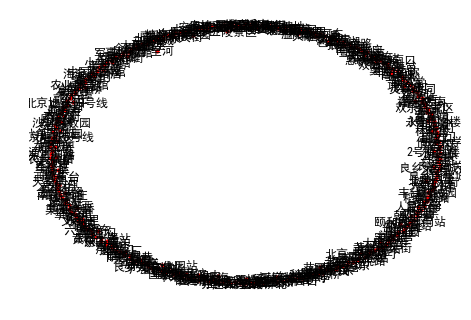

In [255]:
import networkx as nx
station_graph = nx.Graph()
station_graph.add_nodes_from(list(station_connection.keys()))
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
nx.draw(station_graph, with_labels=True, node_size=10)

In [256]:
station_connection_graph = station_connection

## 广度优先搜索

In [257]:
def transfer_stations_first(pathes):
    return sorted(pathes,key=len)

In [258]:
def bfs(start, destination, sort_candidate=transfer_stations_first):
    pathes = [[start]]
    visited_station = set()
    while pathes:
        path = pathes.pop(0)
        station = path[-1]
        if station in visited_station:
            continue
        
        next_stations = station_connection_graph[station]
        for next_station in next_stations:
            if next_station in path: # eliminate loop
                continue
            new_path = path + [next_station]  #此处的顺序决定广度优先还是深度优先
            pathes.append(new_path)
            if next_station == destination:
                return new_path
            
        visited_station.add(station)
        pathes = sort_candidate(pathes)
        

In [259]:
bfs('传媒大学','南锣鼓巷')

['传媒大学', '高碑店', '四惠东', '四惠', '大望路', '国贸', '永安里', '建国门', '朝阳门', '东四', '南锣鼓巷']

In [260]:
bfs('苹果园','四惠东')

['苹果园',
 '杨庄',
 '西黄村',
 '廖公庄',
 '田村',
 '海淀五路居',
 '慈寿寺',
 '花园桥',
 '白石桥南',
 '车公庄西',
 '车公庄',
 '平安里',
 '北海北',
 '南锣鼓巷',
 '东四',
 '朝阳门',
 '建国门',
 '永安里',
 '国贸',
 '大望路',
 '四惠',
 '四惠东']